### In this Notebook we will use **Clustering Analysis** to understand how Pages Duration vs Rattes can be grouped.
- We will start with building two function one to plot the Number of clusters vs WCSS and one to plot the scatter of the two columns hued by the clustering algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(111)

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### In Order to do Clustering Analysis We must remove the outliers as they corrupt the centriods. Those are conditions represents outliers.
- Administrative Duration > 1750
- Informational Duration > 1550
- ProductRelated Duration > 30000

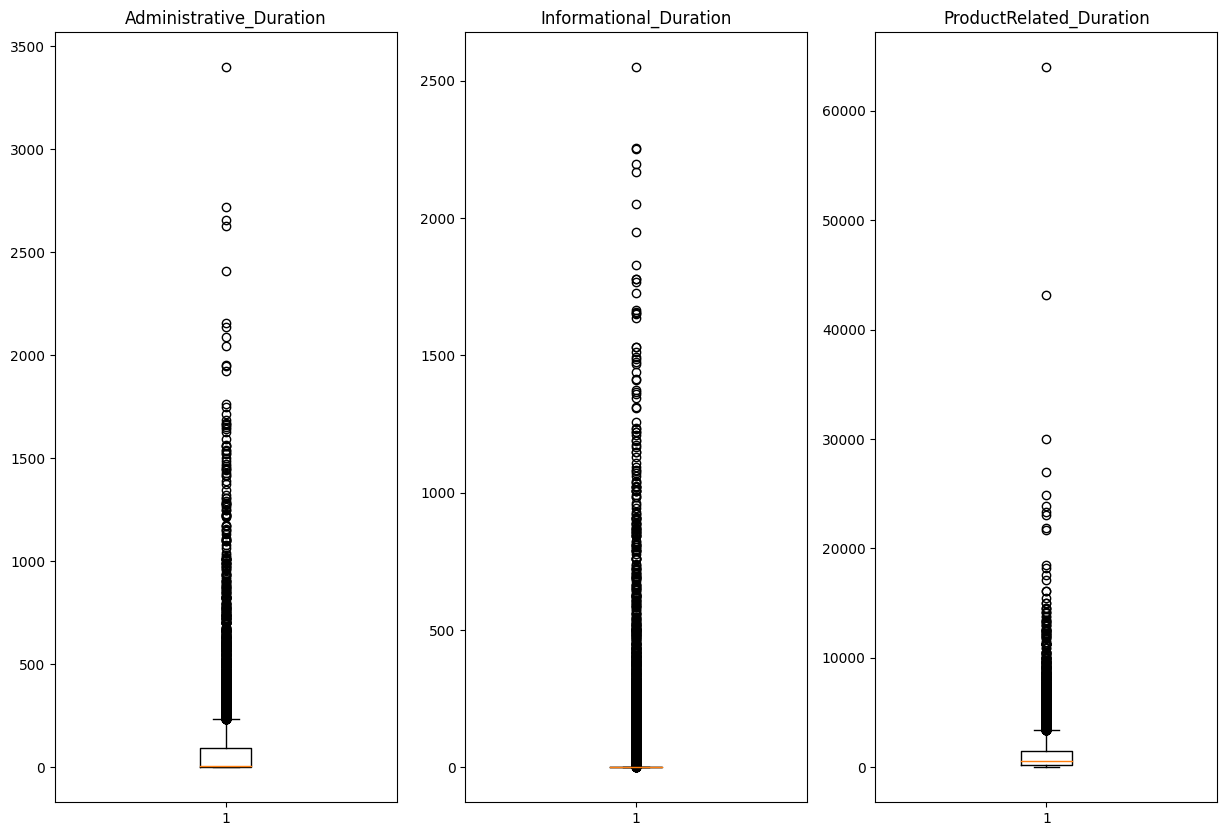

In [3]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

# Flatten the axs array to easily access each subplot
axs = axs.flatten()

# Create a boxplot for each column in the DataFrame
for i, column in enumerate(df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(column)


In [4]:
mask1 = df['Administrative_Duration'] > 1750
mask2 = df['Informational_Duration'] > 1550
mask3 = df['ProductRelated_Duration'] > 30000

index = df[mask1 | mask2 | mask3].index
df.drop(index, axis=0, inplace=True)

In [5]:
def plot_within_cluster_sum_squares_vs_no_clusters(cols, max_clusters=10):
    """
    Plots the within-cluster sum of squares vs number of clusters using KMeans clustering algorithm.
    Args:
        cols: list of column names to be used for clustering
    """
    x = df[cols].values
    wcss = []
    
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='elkan', tol=0.001)
        km.fit(x)
        wcss.append(km.inertia_)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, '-o')
    plt.xlabel('Number of clusters', fontsize=14)
    plt.ylabel('Within-cluster sum of squares', fontsize=14)
    plt.title('Elbow Method', fontsize=16)
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.savefig(f'figs/elbow method for {cols[0]} and {cols[1]}.png', format='png')
    plt.show()


In [6]:
def scatter_clustered_cols(cols, n_clusters=3):
    """
    Plot a scatter plot of two columns from a DataFrame, with the points colored by their KMeans cluster assignment.

    Parameters:
        cols (list of str): The names of the two columns to plot.
        n_clusters (int): The number of clusters to use in the KMeans algorithm. Default is 2.

    Raises:
        ValueError: If the input DataFrame does not contain the specified columns.

    Returns:
        None
    """
    if not all(col in df.columns for col in cols):
        raise ValueError("Input DataFrame does not contain specified columns")

    x = df[cols].values
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_means = km.fit_predict(x)

    plt.figure(figsize=(14, 8))
    plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='Cluster 1')
    plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='Cluster 2')
    plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='Cluster 3')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=50, c='blue' , label='centeroid')

    plt.title(f'{cols[0]} vs {cols[1]}', fontsize=20)
    plt.grid()
    plt.xlabel(f'{cols[0]}')
    plt.ylabel(f'{cols[1]}')
    plt.legend(loc='best')
    plt.savefig(f'figs/scatter of {cols[0]} and {cols[1]} hued by the clustering algorithm.png', format='png')
    plt.show()
    print(km.cluster_centers_)


- Administrative_Duration vs Rates (BouceRates, ExitRates)
    - it appears that the Cyan Cluster has the highest number of Informational Durations, indicating that these customers spend more time on informational pages on the website **Target Customers** . Therefore, I would recommend that the company focus more on this cluster to understand their needs and preferences and tailor their marketing strategies to cater to these customers.
    - Additionally, the Yellow Cluster also appears to have a high average of Informational Duration and a low Bounce Rate, which suggests that these customers may have a higher likelihood of making a purchase **Potential-Target Customers** . So, the company may also want to pay attention to this cluster and devise marketing strategies to encourage them to make a purchase.

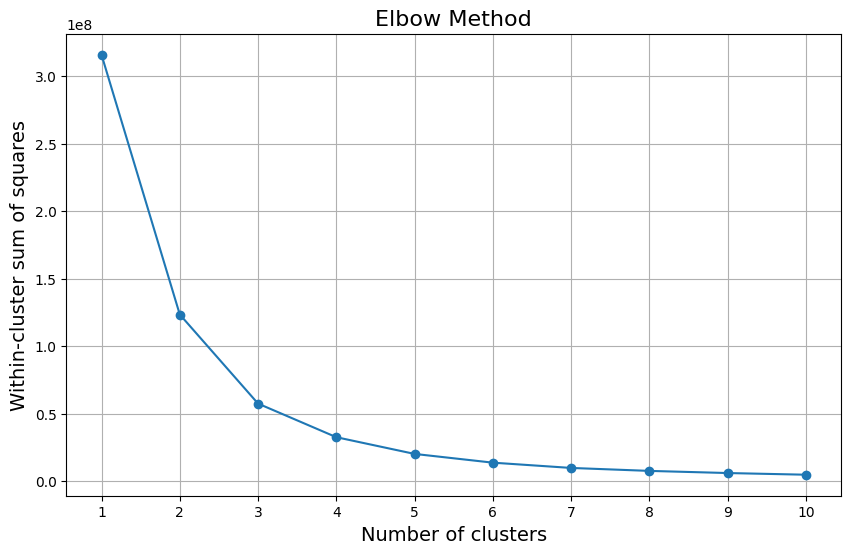

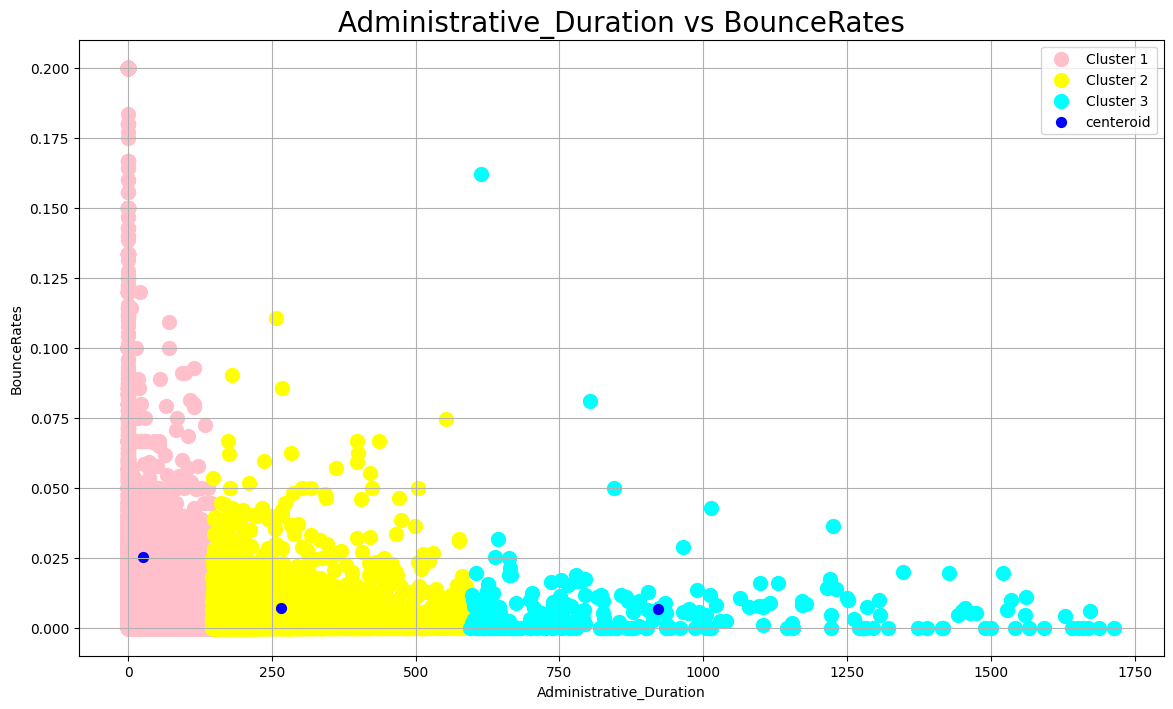

[[2.55770960e+01 2.53162522e-02]
 [2.66304502e+02 6.81499808e-03]
 [9.21127894e+02 6.62695555e-03]]


In [7]:
cols = ['Administrative_Duration', 'BounceRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 3
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

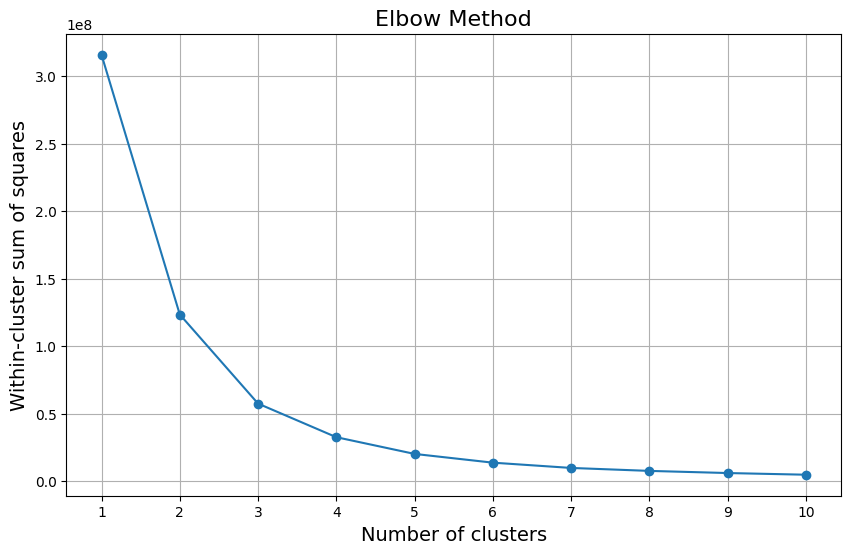

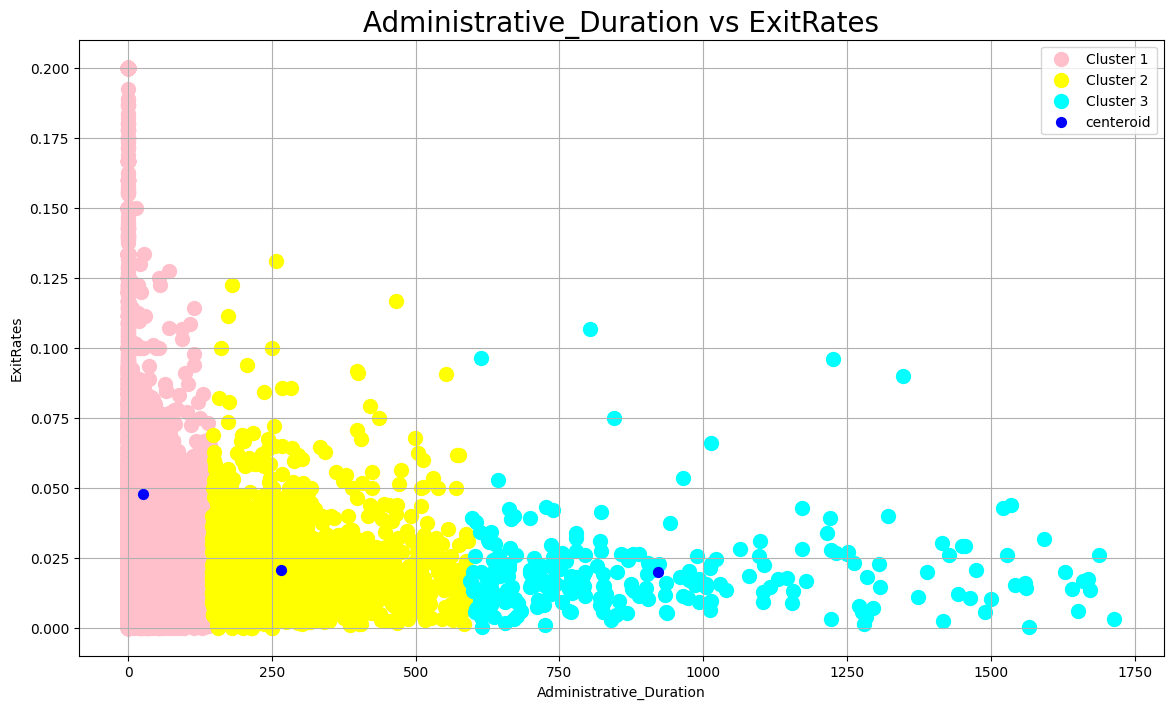

[[2.55770960e+01 4.76607194e-02]
 [2.66304502e+02 2.04834175e-02]
 [9.21127894e+02 2.00240484e-02]]


In [8]:
cols = ['Administrative_Duration', 'ExitRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 3
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

- Informational_Duration vs Rates (BouceRates, ExitRates)
    - it appears that the Yellow Cluster has the highest number of Informational Durations, indicating that these customers spend more time on informational pages on the website **Target Customers** . Therefore, I would recommend that the company focus more on this cluster to understand their needs and preferences and tailor their marketing strategies to cater to these customers.
    - Additionally, the Cyan cluster also appears to have a high average of Informational Duration and a low Bounce Rate, which suggests that these customers may have a higher likelihood of making a purchase **Potential-Target Customers** . So, the company may also want to pay attention to this cluster and devise marketing strategies to encourage them to make a purchase.

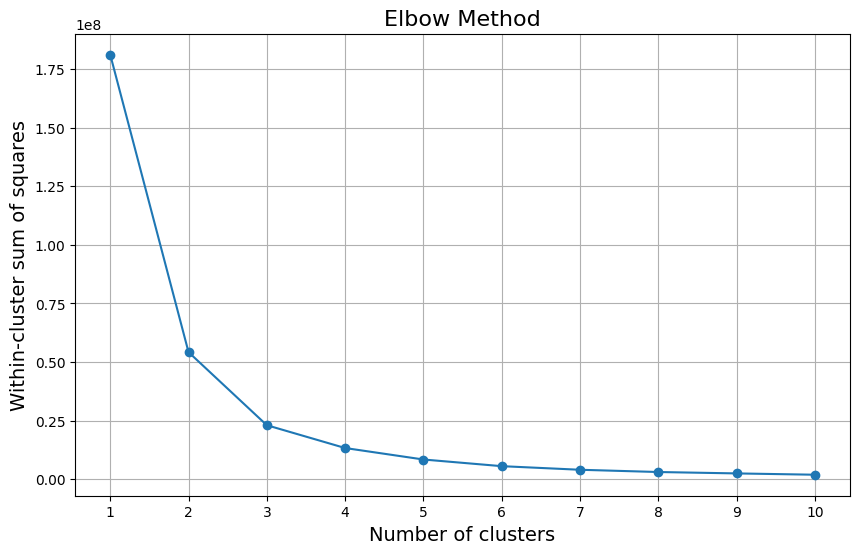

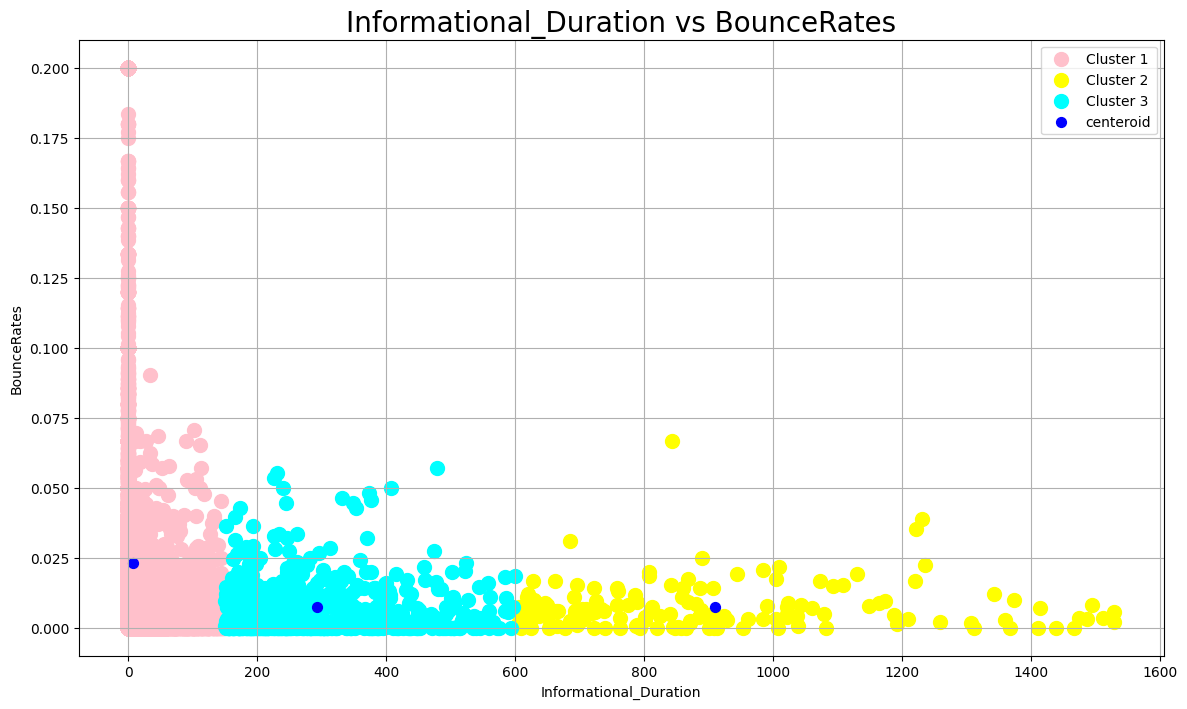

[[7.47361836e+00 2.31629939e-02]
 [9.10840442e+02 7.42328340e-03]
 [2.92573108e+02 7.29266627e-03]]


In [9]:
cols = ['Informational_Duration', 'BounceRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 3
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

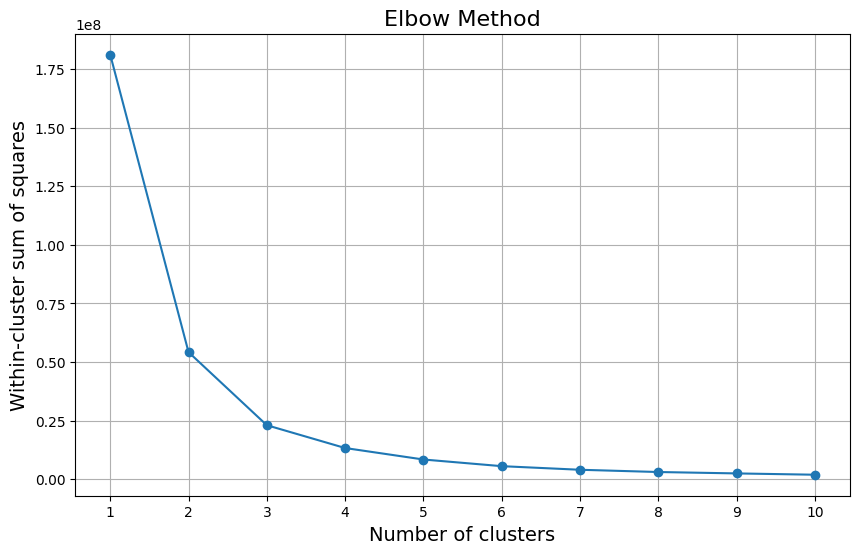

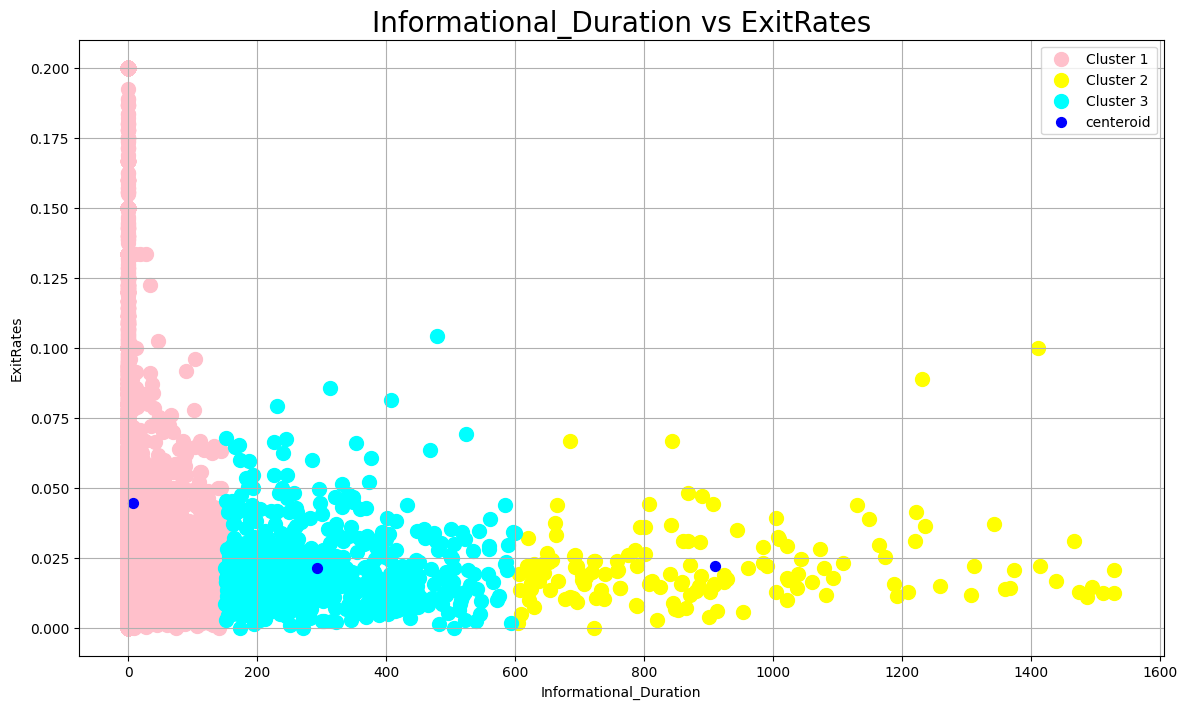

[[7.47361836e+00 4.44832696e-02]
 [9.10840442e+02 2.18911457e-02]
 [2.92573108e+02 2.12702759e-02]]


In [10]:
cols = ['Informational_Duration', 'ExitRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 3
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

- ProductRelated_Duration vs Rates (BouceRates, ExitRates)
    - it appears that the Cyan Cluster has the highest number of Informational Durations, indicating that these customers spend more time on informational pages on the website **Target Customers** . Therefore, I would recommend that the company focus more on this cluster to understand their needs and preferences and tailor their marketing strategies to cater to these customers.
    - Additionally, the Yellow Cluster also appears to have a high average of Informational Duration and a low Bounce Rate, which suggests that these customers may have a higher likelihood of making a purchase **Potential-Target Customers** . So, the company may also want to pay attention to this cluster and devise marketing strategies to encourage them to make a purchase.

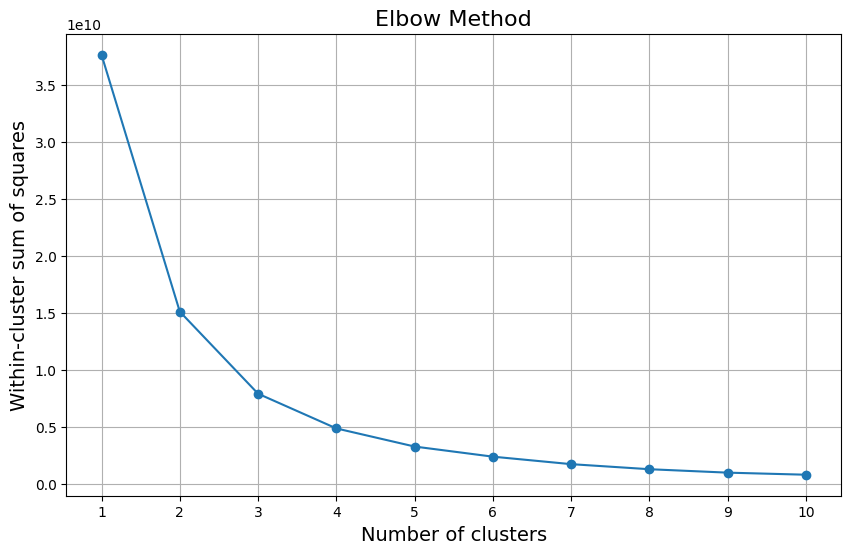

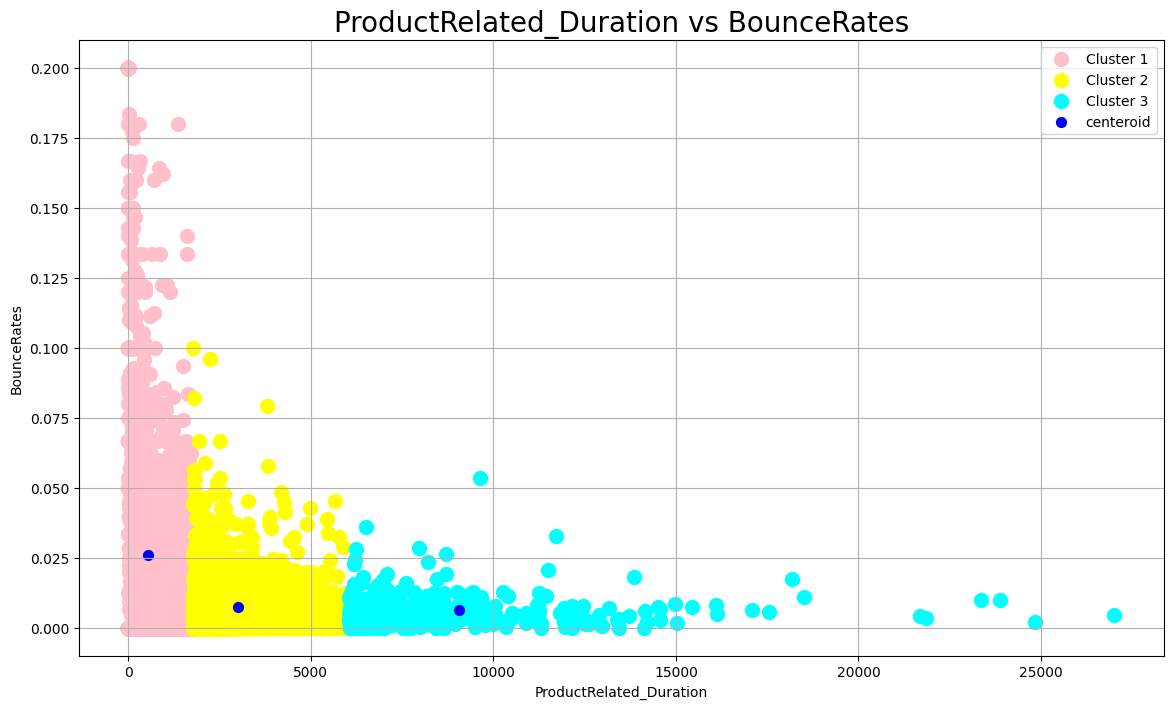

[[5.37098180e+02 2.59691188e-02]
 [3.00079181e+03 7.37882757e-03]
 [9.05110822e+03 6.16046411e-03]]


In [11]:
cols = ['ProductRelated_Duration', 'BounceRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 3
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

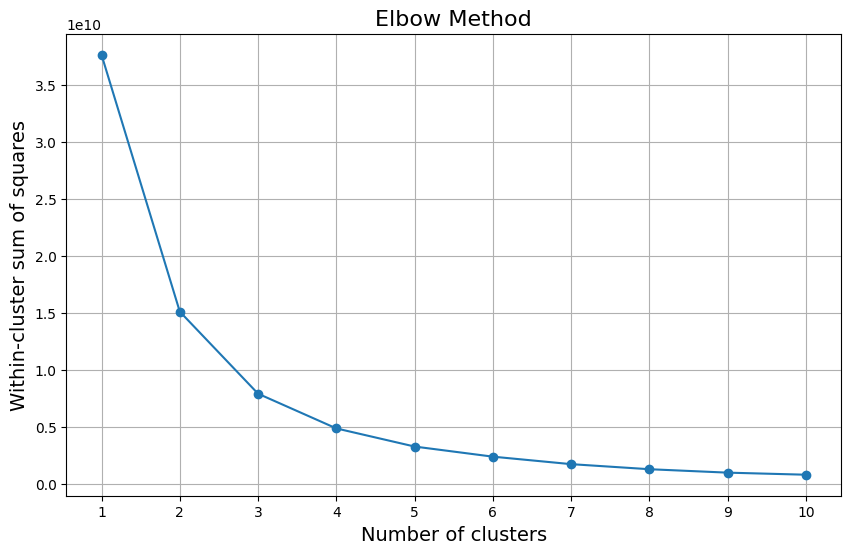

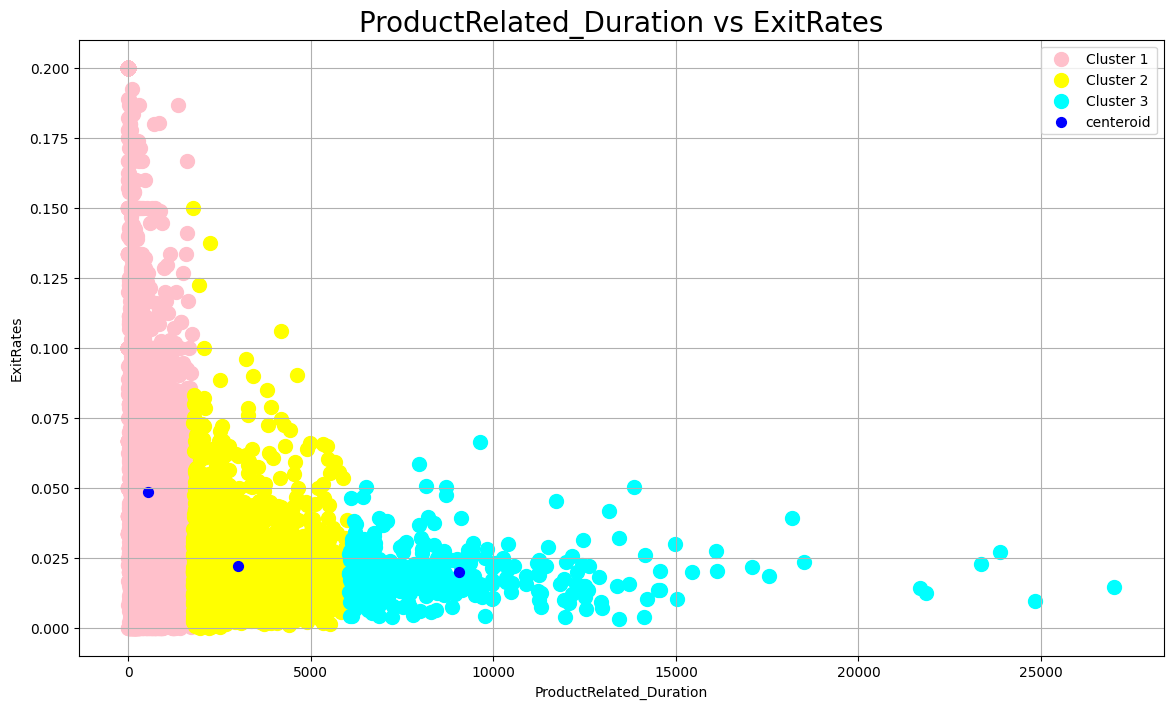

[[5.37098180e+02 4.84519130e-02]
 [3.00079181e+03 2.20313512e-02]
 [9.05110822e+03 1.96912852e-02]]


In [12]:
cols = ['ProductRelated_Duration', 'ExitRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 3
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)